# Ayush Thada
# 16BCE1333
# Assignement 2

In [31]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_excel("Iris.xls")

In [3]:
print("Train Set Shape: {}".format(train_df.shape))

Train Set Shape: (150, 5)


In [4]:
train_df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Assigining Numerical Labels to Categeorical Values

In [5]:
class LabelEncoder:
    def __init__(self):
        self.count = 0
        self.labels = {}
        
    def fit(self, y):
        for x in list(set(y)):
            self.labels[x] = self.count
            self.count +=1
    
    def transform(self, y):
        mask = [x in list(self.labels.keys()) for x in y]
        
        for i in range(len(y)):
            if mask[i] is True:
                y[i] = self.labels[y[i]]
            else:
                self.labels[y[i]] = self.count
                y[i] = self.labels[y[i]]
                mask[i] = True
                self.count += 1
        return y

In [6]:
encoder = LabelEncoder()

In [7]:
X = train_df[['sepal length', 'sepal width', 'petal length', 'petal width']].values

In [8]:
encoder.fit(train_df["iris"])

In [9]:
Y = encoder.transform(train_df["iris"])
Y = Y.values

/home/ayush/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std_x = StandardScaler()
std_x.fit(X.astype(np.float32))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_std = std_x.transform(X.astype(np.float32))

# Standardized Data Analysis

In [17]:
# Checking Accuracy Without any Dimensionality Reducction.

X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.30, random_state=42)

classifier1 = MLPClassifier(hidden_layer_sizes=(25,1,), max_iter= 800, random_state=9)
classifier1.fit(X_train, list(y_train))

y_pred = classifier1.predict(X_test)

print("Accuracy Score is {:0.4f}%".format(100*accuracy_score(list(y_test), list(y_pred))))
print("Recall Score is {:0.4f}%".format(100*recall_score(list(y_test), list(y_pred), average="micro")))
print("Precision Score is {:0.4f}%".format(100*precision_score(list(y_test), list(y_pred), average="micro")))

Accuracy Score is 100.0000%
Recall Score is 100.0000%
Precision Score is 100.0000%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Linear Principle Component Analysis

In [18]:
from sklearn.decomposition import PCA

In [22]:
cache_mapping = encoder.labels.keys()

We can see that data is not not linearly seprable when we do Linear PCA on the data.       
Hence We have to go for Kernel PCA


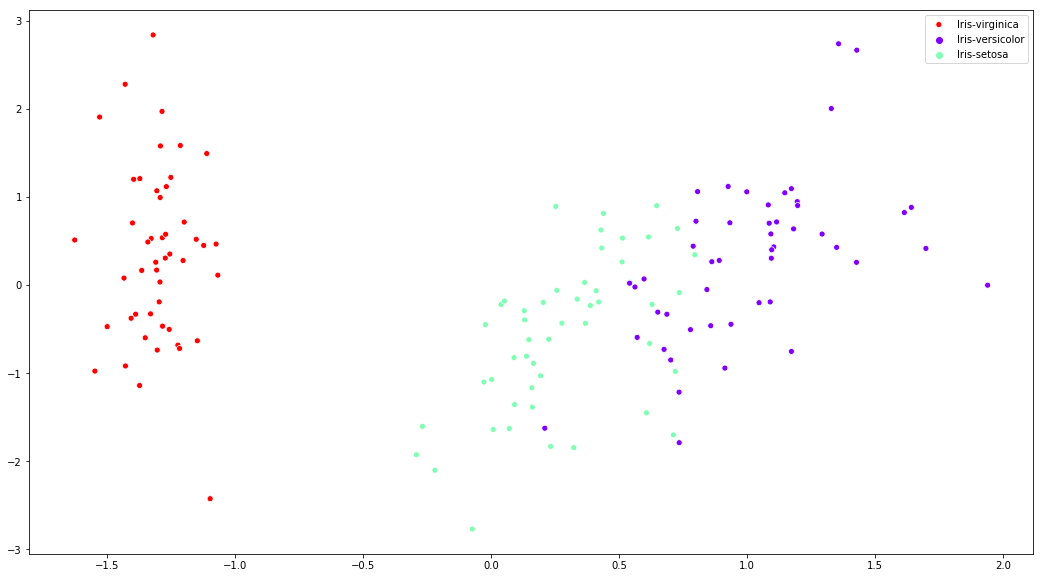

In [26]:
pca_x = PCA(n_components=2)
pca_x.fit(X_std)

X_pca = pca_x.transform(X_std)

std_x1 = StandardScaler()
std_x1.fit(X_pca)

X_pca_norm = std_x1.transform(X_pca)

plt.figure(figsize=(18,10))
sns.scatterplot(X_pca_norm[:,0], X_pca_norm[:,1], hue=list(Y), palette="rainbow")
plt.legend(labels=list(cache_mapping))

print("We can see that data is not not linearly seprable when we do Linear PCA on the data.\
       \nHence We have to go for Kernel PCA")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_norm, Y, test_size=0.35, random_state=42)

classifier1 = MLPClassifier(hidden_layer_sizes=(42,1,), max_iter= 800, random_state=9)
classifier1.fit(X_train, list(y_train))

y_pred = classifier1.predict(X_test)

print("Accuracy Score is {:0.4f}%".format(100*accuracy_score(list(y_test), list(y_pred))))
print("Recall Score is {:0.4f}%".format(100*recall_score(list(y_test), list(y_pred), average="micro")))
print("Precision Score is {:0.4f}%".format(100*precision_score(list(y_test), list(y_pred), average="micro")))

Accuracy Score is 96.2264%
Recall Score is 96.2264%
Precision Score is 96.2264%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Kernel Principle Component Analysis

In [29]:
from sklearn.decomposition.kernel_pca import KernelPCA

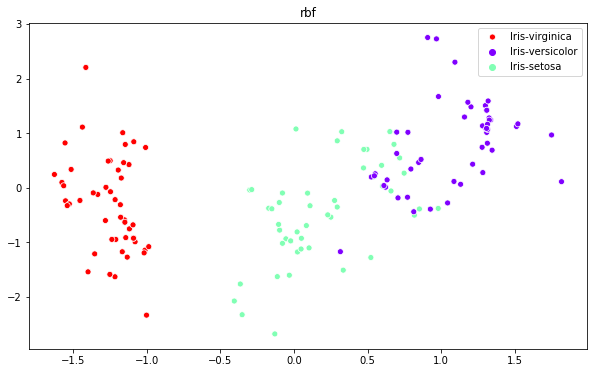

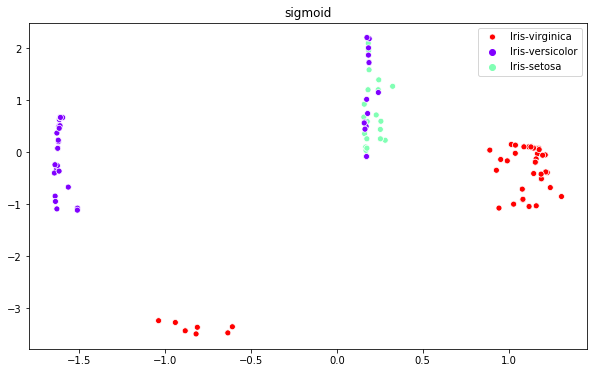

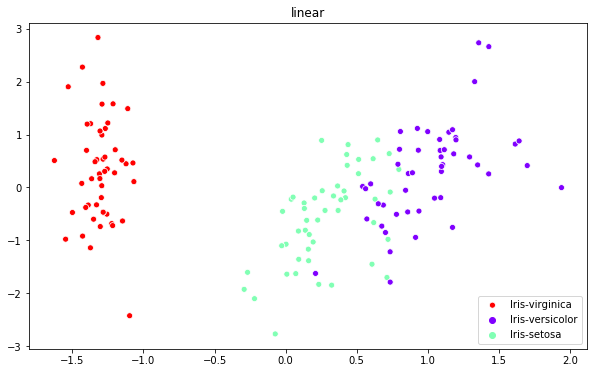

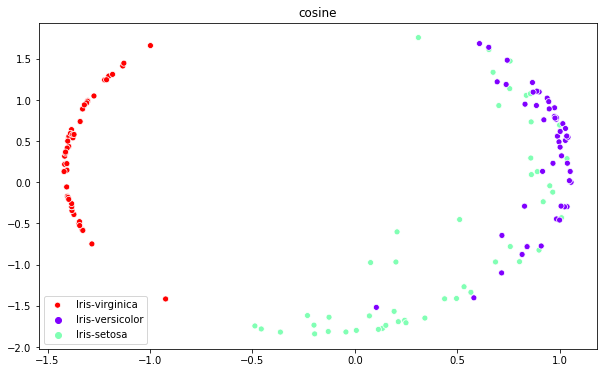

In [30]:
kernels = ["rbf", "sigmoid", "linear", "cosine"]

for kx in kernels:
    kpca_x = KernelPCA(n_components=2, kernel=kx, random_state=42, gamma=1e-8)
    kpca_x.fit(X_std)

    X_kpca = kpca_x.transform(X_std)

    std_x2 = StandardScaler()
    std_x2.fit(X_kpca)

    X_kpca_norm = std_x2.transform(X_kpca)

    plt.figure(figsize=(10,6))
    sns.scatterplot(X_kpca_norm[:,0], X_kpca_norm[:,1], hue=list(Y), palette="rainbow")
    
    plt.legend(labels=list(cache_mapping))
    plt.title(kx)
    plt.show()


In [40]:
kernels = ["rbf", "linear", "cosine", "sigmoid"]
kernel_dict = {"rbf": 54, "linear":42 , "cosine":12 , "sigmoid":12}

for kx in kernels:
    kpca_x = KernelPCA(n_components=2, kernel=kx, random_state=42, gamma=1e-6)
    kpca_x.fit(X_std)

    X_kpca = kpca_x.transform(X_std)

    std_x2 = StandardScaler()
    std_x2.fit(X_kpca)

    X_kpca_norm = std_x2.transform(X_kpca)

    X_train, X_test, y_train, y_test = train_test_split(X_kpca_norm, Y, test_size=0.35, random_state=42)

    classifier1 = MLPClassifier(hidden_layer_sizes=(kernel_dict[kx],1,), max_iter= 800, random_state=9)
    classifier1.fit(X_train, list(y_train))

    y_pred = classifier1.predict(X_test)
        
    print("\n\n{} Kernel".format(kx))
    print("Accuracy Score is {:0.4f}%".format(100*accuracy_score(list(y_test), list(y_pred))))
    print("Recall Score is {:0.4f}%".format(100*recall_score(list(y_test), list(y_pred), average="micro")))
    print("Precision Score is {:0.4f}%".format(100*precision_score(list(y_test), list(y_pred), average="micro")))

/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




rbf Kernel
Accuracy Score is 96.2264%
Recall Score is 96.2264%
Precision Score is 96.2264%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




linear Kernel
Accuracy Score is 96.2264%
Recall Score is 96.2264%
Precision Score is 96.2264%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




cosine Kernel
Accuracy Score is 84.9057%
Recall Score is 84.9057%
Precision Score is 84.9057%


sigmoid Kernel
Accuracy Score is 96.2264%
Recall Score is 96.2264%
Precision Score is 96.2264%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Linear Discriminant Analysis

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

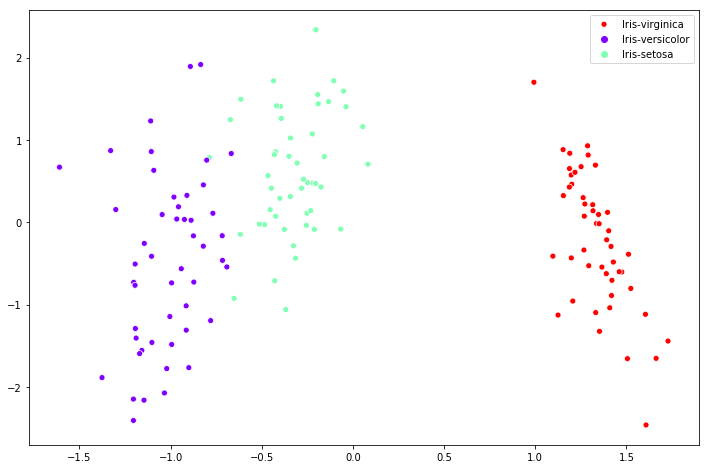

In [35]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_std , list(Y))

X_lda = lda.transform(X_std)

std_x3 = StandardScaler()
std_x3.fit(X_lda)

X_lda_norm = std_x3.transform(X_lda)

plt.figure(figsize=(12,8))
sns.scatterplot(X_lda_norm[:,0], X_lda_norm[:,1], hue=list(Y), palette="rainbow")
plt.legend(labels=list(cache_mapping))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lda_norm, Y, test_size=0.35, random_state=42)

classifier1 = MLPClassifier(hidden_layer_sizes=(3,1,), max_iter= 800, random_state=9)
classifier1.fit(X_train, list(y_train))

y_pred = classifier1.predict(X_test)

print("Accuracy Score is {:0.4f}%".format(100*accuracy_score(list(y_test), list(y_pred))))
print("Recall Score is {:0.4f}%".format(100*recall_score(list(y_test), list(y_pred), average="micro")))
print("Precision Score is {:0.4f}%".format(100*precision_score(list(y_test), list(y_pred), average="micro")))

Accuracy Score is 100.0000%
Recall Score is 100.0000%
Precision Score is 100.0000%


/home/ayush/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
